In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import time
from natsort import natsorted
from pandas import DataFrame
import pandas as pd
import matplotlib.cm as cm
cmap = cm.hot

def get_img_files(folder):
    files = list(filter(lambda file: any(ext in file.lower() for ext in ['png','jpg','bmp']), os.listdir(folder)))
    files = natsorted(files)[::1]
    images = list(map(lambda x: cv2.imread(folder+'/'+x, 0), files))
    return np.array(images)

def img_to_coord(img):
    coord_mat = np.ones((3, img.shape[0]*img.shape[1]))
    count = 0
    for x in range(img.shape[1]):
        for y in range(img.shape[0]):
            coord_mat[:, count] = np.array([x, img.shape[0]-y, img[y,x]])
            count += 1
    return coord_mat

def plot_coord_mat(coord_mat, ax):
    ax.scatter(coord_mat[0, :], coord_mat[1, :], c=coord_mat[2, :])

def rotation_matrix(degrees):
    theta = np.radians(degrees)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s, 0), (s, c, 0), (0, 0, 1)))
    return R

def weighted_pca_regression(x_vec, y_vec, weights):
    """
    Given three real-valued vectors of same length, corresponding to the coordinates
    and weight of a 2-dimensional dataset, this function outputs the angle in radians
    of the line that aligns with the (weighted) average and main linear component of
    the data. For that, first a weighted mean and covariance matrix are computed.
    Then u,e,v=svd(cov) is performed, and u * f(x)=0 is solved.
    """
    input_mat = np.stack([x_vec, y_vec])
    weights_sum = weights.sum()
    # Subtract (weighted) mean and compute (weighted) covariance matrix:
    mean_x, mean_y =  weights.dot(x_vec)/weights_sum, weights.dot(y_vec)/weights_sum
    centered_x, centered_y = x_vec-mean_x, y_vec-mean_y
    matrix_centered = np.stack([centered_x, centered_y])
    weighted_cov = matrix_centered.dot(np.diag(weights).dot(matrix_centered.T)) / weights_sum
    # We know that v rotates the data's main component onto the y=0 axis, and
    # that u rotates it back. Solving u.dot([x,0])=[x*u[0,0], x*u[1,0]] gives
    # f(x)=(u[1,0]/u[0,0])x as the reconstructed function.
    u,e,v = np.linalg.svd(weighted_cov)
    eig_val = np.sqrt(e)
    print(u[1,0], u[0,1])
    if u[1,0] < 0:
        eig_val[0] = -1*eig_val[0]
    if u[0,1] < 0:
        eig_val[1] = -1*eig_val[1]
        
    return eig_val[0]*u[:,0], eig_val[1]*u[:,1], np.array([mean_x, mean_y])
        
def coord_to_img(coord_mat, bbox=[-60,60,-60,60]):
    x_min = bbox[0]
    x_max = bbox[1]
    y_min = bbox[2]
    y_max = bbox[3]
    width = x_max - x_min
    height = y_max - y_min
    
    img = np.zeros([y_max-y_min, x_max-x_min])
    for col in range(coord_mat.shape[1]):
        x = coord_mat[0, col]
        y = coord_mat[1, col]
        val = coord_mat[2, col]
        new_x = int(x - x_min)
        new_y = int(y_max - y)
        if (0 <= new_x) and (new_x < width) and (0 <= new_y) and (new_y < height):
            img[new_y, new_x] = val
    return img
    
for folder in ['fives','sixes','sevens','eights','nines','people']:
    imgs = get_img_files(os.getcwd()+'/'+folder)

    coord_mats = []
    transformed_mats = []
    transformed_mats_2 = []
    # fig, ax = plt.subplots(3, figsize=(10,10))
    for index, img in enumerate(imgs[:]):
        img = cv2.resize(img, (100,100))
        img = img/img.max()
    #     fig, ax = plt.subplots(1, 2, figsize=(9,9))
    #     ax.imshow(img)

        coord_mat = img_to_coord(img)

     
        plot_coord_mat(transformed_mat, ax[1])
        ax[0].set_xlim([0,100])
        ax[0].set_ylim([0,100])
        ax[1].set_xlim([-60,60])
        ax[1].set_ylim([-60,60])
        ax[1].set_title("{}, {}".format(eig_1, eig_2))

        coord_mats.append(coord_to_img(coord_mat.copy(), bbox=[0,100,0,100]))
        transformed_mats_2.append(coord_to_img(np.matmul(R, coord_mat - mean_mat).copy(), bbox=[-60,60,-60,60]))
        transformed_mats.append(coord_to_img(transformed_mat.copy(), bbox=[-60,60,-60,60]))

    fig2, ax2 = plt.subplots(1,3,figsize=(30,30))
    combined_orig = []
    combined_transformed = []
    # plot_coord_mat(coord_mats[0] + coord_mats[1], ax2[0])
    combined_orig = sum(coord_mats)
    combined_transformed = sum(transformed_mats)
    combined_transformed_2 = sum(transformed_mats_2)
    ax2[0].imshow(combined_orig)
    ax2[0].set_title("Overlay of Original")
    ax2[1].imshow(combined_transformed_2)
    ax2[1].set_title("Overlay of Rotated")
    ax2[2].imshow(combined_transformed)
    ax2[2].set_title("Overlay of Rotated & scaled")
    fig2.savefig("Sevens_full.png")
    # transformed_mats[1][2,:] += transformed_mats[0][2,:]
    # plot_coord_mat(coord_mats[0] + coord_mats[1], ax2[0])
    # # plot_coord_mat(transformed_mats[0], ax2[1])
    # plot_coord_mat(transformed_mats[1], ax2[1])

NameError: name 'transformed_mat' is not defined

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import time
from natsort import natsorted
from pandas import DataFrame
import pandas as pd
import matplotlib.cm as cm
cmap = cm.hot

def get_img_files(folder):
    files = list(filter(lambda file: any(ext in file.lower() for ext in ['png','jpg','bmp']), os.listdir(folder)))
    files = natsorted(files)[::1]
    images = list(map(lambda x: cv2.imread(folder+'/'+x, 0), files))
    return np.array(images)

def img_to_coord(img):
    coord_mat = np.ones((3, img.shape[0]*img.shape[1]))
    count = 0
    for x in range(img.shape[1]):
        for y in range(img.shape[0]):
            coord_mat[:, count] = np.array([x, img.shape[0]-y, img[y,x]])
            count += 1
    return coord_mat

def plot_coord_mat(coord_mat, ax):
    ax.scatter(coord_mat[0, :], coord_mat[1, :], c=coord_mat[2, :])

def rotation_matrix(degrees):
    theta = np.radians(degrees)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s, 0), (s, c, 0), (0, 0, 1)))
    return R

def weighted_pca_regression(x_vec, y_vec, weights):
    """
    Given three real-valued vectors of same length, corresponding to the coordinates
    and weight of a 2-dimensional dataset, this function outputs the angle in radians
    of the line that aligns with the (weighted) average and main linear component of
    the data. For that, first a weighted mean and covariance matrix are computed.
    Then u,e,v=svd(cov) is performed, and u * f(x)=0 is solved.
    """
    input_mat = np.stack([x_vec, y_vec])
    weights_sum = weights.sum()
    # Subtract (weighted) mean and compute (weighted) covariance matrix:
    mean_x, mean_y =  weights.dot(x_vec)/weights_sum, weights.dot(y_vec)/weights_sum
    centered_x, centered_y = x_vec-mean_x, y_vec-mean_y
    matrix_centered = np.stack([centered_x, centered_y])
    weighted_cov = matrix_centered.dot(np.diag(weights).dot(matrix_centered.T)) / weights_sum
    # We know that v rotates the data's main component onto the y=0 axis, and
    # that u rotates it back. Solving u.dot([x,0])=[x*u[0,0], x*u[1,0]] gives
    # f(x)=(u[1,0]/u[0,0])x as the reconstructed function.
    u,e,v = np.linalg.svd(weighted_cov)
    eig_val = np.sqrt(e)
    print(u[1,0], u[0,1])
    if u[1,0] < 0:
        eig_val[0] = -1*eig_val[0]
    if u[0,1] < 0:
        eig_val[1] = -1*eig_val[1]
        
    return eig_val[0]*u[:,0], eig_val[1]*u[:,1], np.array([mean_x, mean_y])
        
def coord_to_img(coord_mat, bbox=[-60,60,-60,60]):
    x_min = bbox[0]
    x_max = bbox[1]
    y_min = bbox[2]
    y_max = bbox[3]
    width = x_max - x_min
    height = y_max - y_min
    
    img = np.zeros([y_max-y_min, x_max-x_min])
    for col in range(coord_mat.shape[1]):
        x = coord_mat[0, col]
        y = coord_mat[1, col]
        val = coord_mat[2, col]
        new_x = int(x - x_min)
        new_y = int(y_max - y)
        if (0 <= new_x) and (new_x < width) and (0 <= new_y) and (new_y < height):
            img[new_y, new_x] = val
    return img
    
    
imgs = get_img_files(os.getcwd()+'/images')

coord_mats = []
transformed_mats = []
# fig, ax = plt.subplots(3, figsize=(10,10))
for index, img in enumerate(imgs[:8]):
    img = cv2.resize(img, (100,100))
    img = img/img.max()
    fig, ax = plt.subplots(1, 2, figsize=(9,9))
#     ax.imshow(img)
    
    coord_mat = img_to_coord(img)

    weights = coord_mat[2, :]

    primary_vector, seconday_vector, mean_vector = weighted_pca_regression(coord_mat[0,:], coord_mat[1,:], coord_mat[2,:])
    angle = np.arctan2(primary_vector[1], primary_vector[0]) * 180 / np.pi
    print(angle, 90-angle)
    ax[0].arrow(*mean_vector, *(primary_vector), width=1, head_width=4, head_length=4)
    ax[0].arrow(*mean_vector, *(seconday_vector), width=1, head_width=4, head_length=4)
    R = rotation_matrix(90-angle)
    scale_mat = np.zeros([3,3])
    scale_mat[:2,0] = primary_vector/np.linalg.norm(primary_vector)
    scale_mat[:2,1] = seconday_vector/np.linalg.norm(seconday_vector)
    scale_mat[2,2] = 1
    second_scale_mat = np.matmul(scale_mat, np.diag([1, 1, 1]))
    mean_mat = np.array([mean_vector[0], mean_vector[1], 0])
    mean_mat = np.diag(mean_mat)
    mean_mat = np.matmul(mean_mat, np.ones(coord_mat.shape))
    plot_coord_mat(coord_mat, ax[0])
    transformed_mat = np.matmul(R, np.matmul(scale_mat.T,np.matmul(second_scale_mat,coord_mat - mean_mat)) )
#     transformed_mat = np.matmul(scale_mat.T,np.matmul(second_scale_mat,coord_mat - mean_mat))
#     transformed_mat = np.matmul(second_scale_mat,coord_mat - mean_mat)
#     transformed_mat = np.matmul(R, coord_mat - mean_mat)
#     transformed_mat = coord_mat - mean_mat
    plot_coord_mat(transformed_mat, ax[1])
    ax[0].set_xlim([0,100])
    ax[0].set_ylim([0,100])
    ax[1].set_xlim([-60,60])
    ax[1].set_ylim([-60,60])
    
    coord_mats.append(coord_to_img(coord_mat.copy(), bbox=[0,100,0,100]))
    transformed_mats.append(coord_to_img(transformed_mat.copy(), bbox=[-60,60,-60,60]))
    
fig, ax2 = plt.subplots(1,2,figsize=(15,15))
combined_orig = []
combined_transformed = []
# plot_coord_mat(coord_mats[0] + coord_mats[1], ax2[0])
combined_orig = sum(coord_mats)
combined_transformed = sum(transformed_mats)
ax2[0].imshow(combined_orig)
ax2[1].imshow(combined_transformed)

# transformed_mats[1][2,:] += transformed_mats[0][2,:]
# plot_coord_mat(coord_mats[0] + coord_mats[1], ax2[0])
# # plot_coord_mat(transformed_mats[0], ax2[1])
# plot_coord_mat(transformed_mats[1], ax2[1])

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/Rees/projects/weightedPCA/images'

In [202]:
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter

def img_to_coord_tensor(img_tensor):
    height, width = img_tensor.shape
    img_tensor = torch.transpose(img_tensor, 0, 1).contiguous().view(1, width * height)

    x_coord = Variable(torch.arange(0, width)).view(width, 1)
    x_coord = x_coord.expand(width, height).contiguous()
    x_coord = x_coord.view(1, width * height)

    y_coord = Variable(torch.arange(height - 1,-1,-1))
    y_coord = y_coord.expand(width, height).contiguous()
    y_coord = y_coord.view(1,width * height)

    coord_mat = torch.cat((x_coord, y_coord))
    img_tensor = torch.cat((coord_mat, img_tensor))

    return img_tensor

img = Variable(torch.FloatTensor([[20,11,0],[0,1,0],[7,9,5]]), requires_grad=False)
img2 = Variable(torch.FloatTensor([[20,11], [0,1],[7,9], [1,5]]), requires_grad=False)
print(img)
h, w = img.shape
print(w,h)
coord_mat = img_to_coord_tensor(img)
rotate_mat = Variable(torch.ones(9,3))
print(rotate_mat.shape, coord_mat.shape)
print(rotate_mat)
rotate_mat = torch.mm(coord_mat, rotate_mat)
print(rotate_mat)
print(coord_mat)

class CoordTransform(torch.nn.Module):

    def __init__(self):
        super(CoordTransform, self).__init__()
        self.img_tensor = img_tensor
    
    def forward(self, img_tensor):
        height, width = img_tensor.shape
        img_tensor = torch.transpose(img_tensor, 0, 1).contiguous().view(1, width * height)

        x_coord = Variable(torch.arange(0, width)).view(width, 1)
        x_coord = x_coord.expand(width, height).contiguous()
        x_coord = x_coord.view(1, width * height)

        y_coord = Variable(torch.arange(height - 1,-1,-1))
        y_coord = y_coord.expand(width, height).contiguous()
        y_coord = y_coord.view(1, width * height)

        coord_mat = torch.cat((x_coord, y_coord))
        img_tensor = torch.cat((img_tensor, coord_mat))
        return img_tensor
    
class AffineUnitary(torch.nn.Module):
    def __init__(self, size_in, size_out):
        super(AffineUnitary, self).__init__()
    
    def forward(self, coord_mat):
        primary_vector, seconday_vector, mean_vector = self.weighted_pca_regression(coord_mat.data.numpy()[0,:],
                                                                               coord_mat.data.numpy()[1,:],
                                                                               coord_mat.data.numpy()[2,:])
        eig_1 = np.linalg.norm(primary_vector)
        eig_2 = np.linalg.norm(seconday_vector)
        angle = np.arctan2(primary_vector[1], primary_vector[0]) * 180 / np.pi
        
        R = rotation_matrix(90-angle)
        
        mean_mat = np.array([mean_vector[0], mean_vector[1], 0])
        mean_mat = np.diag(mean_mat)
        mean_mat = np.matmul(mean_mat, np.ones(coord_mat.shape))
        mean_mat = torch.from_numpy(mean_mat)

        
        norm_scale_mat = np.zeros([3,3])
        norm_scale_mat[0,0] = 5/eig_2
        norm_scale_mat[1,1] = 15/eig_1
        norm_scale_mat[2,2] = 1
        norm_scale_mat = torch.from_numpy(norm_scale_mat)
        
        coord_mat = torch.mm(norm_scale_mat, np.matmul(R, coord_mat - mean_mat))
        
        coord_mat
        return coord_mat
    
    def weighted_pca_regression(self, x_vec, y_vec, weights):
        """
        Given three real-valued vectors of same length, corresponding to the coordinates
        and weight of a 2-dimensional dataset, this function outputs the angle in radians
        of the line that aligns with the (weighted) average and main linear component of
        the data. For that, first a weighted mean and covariance matrix are computed.
        Then u,e,v=svd(cov) is performed, and u * f(x)=0 is solved.
        """
        input_mat = np.stack([x_vec, y_vec])
        weights_sum = weights.sum()
        # Subtract (weighted) mean and compute (weighted) covariance matrix:
        mean_x, mean_y =  weights.dot(x_vec)/weights_sum, weights.dot(y_vec)/weights_sum
        centered_x, centered_y = x_vec-mean_x, y_vec-mean_y
        matrix_centered = np.stack([centered_x, centered_y])
        weighted_cov = matrix_centered.dot(np.diag(weights).dot(matrix_centered.T)) / weights_sum
        # We know that v rotates the data's main component onto the y=0 axis, and
        # that u rotates it back. Solving u.dot([x,0])=[x*u[0,0], x*u[1,0]] gives
        # f(x)=(u[1,0]/u[0,0])x as the reconstructed function.
        u,e,v = np.linalg.svd(weighted_cov)
        eig_val = np.sqrt(e)
        print(u[1,0], u[0,1])
        if u[1,0] < 0:
            eig_val[0] = -1*eig_val[0]
        if u[0,1] < 0:
            eig_val[1] = -1*eig_val[1]

        return eig_val[0]*u[:,0], eig_val[1]*u[:,1], np.array([mean_x, mean_y])
    
    def coord_to_img(self, coord_mat, bbox=[-60,60,-60,60]):
        x_min = bbox[0]
        x_max = bbox[1]
        y_min = bbox[2]
        y_max = bbox[3]
        width = x_max - x_min
        height = y_max - y_min

        img = torch.zeros([y_max-y_min, x_max-x_min])
        for col in range(coord_mat.shape[1]):
            x = coord_mat[0, col]
            y = coord_mat[1, col]
            val = coord_mat[2, col]
            new_x = int(x - x_min)
            new_y = int(y_max - y)
            if (0 <= new_x) and (new_x < width) and (0 <= new_y) and (new_y < height):
                img[new_y, new_x] = val
        return img
    
class SimpleCNN(torch.nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = torch.nn.conv2D(1,10)
        self.conv1 = torch.nn.conv2D(1,10)
        
    def forward(self, x):
        pass

Variable containing:
 20  11   0
  0   1   0
  7   9   5
[torch.FloatTensor of size 3x3]

3 3
torch.Size([9, 3]) torch.Size([3, 9])
Variable containing:
    1     1     1
    1     1     1
    1     1     1
    1     1     1
    1     1     1
    1     1     1
    1     1     1
    1     1     1
    1     1     1
[torch.FloatTensor of size 9x3]

Variable containing:
  9   9   9
  9   9   9
 53  53  53
[torch.FloatTensor of size 3x3]

Variable containing:
    0     0     0     1     1     1     2     2     2
    2     1     0     2     1     0     2     1     0
   20     0     7    11     1     9     0     0     5
[torch.FloatTensor of size 3x9]



In [125]:
x_cord = torch.arange(0,3).view(3,1)
x_cord = x_cord.expand(3,4).contiguous()
x_cord = x_cord.view(1,12)
print(x_cord, x_cord.shape)


    0     0     0     0     1     1     1     1     2     2     2     2
[torch.FloatTensor of size 1x12]
 torch.Size([1, 12])


In [200]:
y_cord = Variable(torch.arange(3,-1,-1))
y_cord = y_cord.expand(3,4).contiguous()
y_cord = y_cord.view(3,4)
print(y_cord)
print(y_cord[:,1])

Variable containing:
 3  2  1  0
 3  2  1  0
 3  2  1  0
[torch.FloatTensor of size 3x4]

Variable containing:
 2
 2
 2
[torch.FloatTensor of size 3]



Variable containing:
 20  11   9
  8   5   4
  3   2   1
[torch.FloatTensor of size 3x3]

Variable containing:
   20    11     9     8     5     4     3     2     1
[torch.FloatTensor of size 1x9]

Variable containing:
 0  1  2
[torch.FloatTensor of size 1x3]

Variable containing:
    0     1     2     0     1     2     0     1     2
[torch.FloatTensor of size 1x9]

[[-1. -1.  0. -1.  0.  1.  0.  1.  1.]
 [ 1.  2.  3.  1.  1.  2.  0.  1.  1.]
 [20. 11.  9.  8.  5.  4.  3.  2.  1.]]
[[ 0.   -0.71  0.71 -1.41  0.    1.41 -0.71  0.71  0.  ]
 [ 2.83  2.12  2.12  1.41  1.41  1.41  0.71  0.71  0.  ]
 [ 9.   11.    4.   20.    5.    1.    8.    2.    3.  ]]


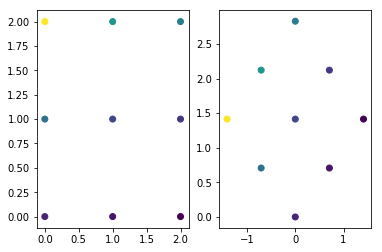

In [306]:
img_tensor = Variable(torch.FloatTensor([[20,11,9],[8,5,4],[3,2,1]]), requires_grad=False)
print(img_tensor)

print(img_tensor.view(1,9))
height, width = img_tensor.shape
img_tensor = img_tensor.view(1, width * height)

x_coord = Variable(torch.arange(0, width)).view(1, width)
print(x_coord)
x_coord = x_coord.expand(height, width).contiguous()
x_coord = x_coord.view(1, width * height)
print(x_coord)

y_coord = Variable(torch.arange(height - 1,-1,-1).view(height,1))
y_coord = y_coord.expand(width, height).contiguous()
y_coord = y_coord.view(1,width * height)

fig, ax = plt.subplots(1,2)
coord_mat = torch.cat((x_coord, y_coord))
img_tensor = torch.cat((coord_mat, img_tensor))
R = rotation_matrix(45)
img_tensor = img_tensor.data.numpy()
plot_coord_mat(img_tensor, ax[0])
# print(np.round_(img_tensor))

img_tensor = np.matmul(R, img_tensor)
print(np.round_(img_tensor))
# print(np.round_(img_tensor))
b = (8,2,2)
a = (3,1,2)
ind = np.lexsort((img_tensor[0,:],-1*img_tensor[1,:]))
print(np.round_(img_tensor[:,ind], decimals=2))
plot_coord_mat(img_tensor, ax[1])

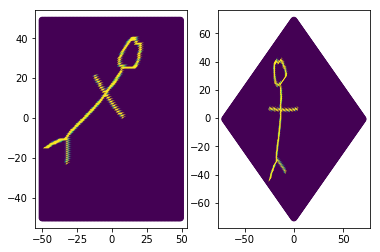

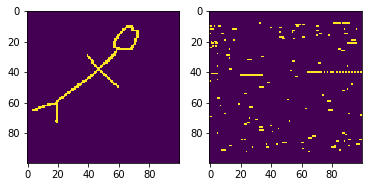

In [440]:
img_tensor = Variable(torch.Tensor(coord_mats[0]), requires_grad=False)
img_tensor.shape

height, width = img_tensor.shape
img_tensor = img_tensor.view(1, width * height)

x_coord = Variable(torch.arange(0, width)).view(1, width)

x_coord = x_coord.expand(height, width).contiguous()
x_coord = x_coord.view(1, width * height)
x_coord = x_coord - 50

y_coord = Variable(torch.arange(height - 1,-1,-1).view(height,1))
y_coord = y_coord.expand(width, height).contiguous()
y_coord = y_coord.view(1,width * height)
y_coord = y_coord - 50

fig, ax = plt.subplots(1,2)
coord_mat = torch.cat((x_coord, y_coord))
img_tensor = torch.cat((coord_mat, img_tensor))
R = rotation_matrix(45)
img_tensor = img_tensor.data.numpy()
plot_coord_mat(img_tensor, ax[0])
# print(np.round_(img_tensor))
print()
img_tensor23 = np.matmul(R, img_tensor)
plot_coord_mat(img_tensor23, ax[1])

def coord_mat_to_img(coord_mat, width, height):
    coord_mat = np.round_(coord_mat)
    ind = np.lexsort((coord_mat[0,:],-1*coord_mat[1,:]))
    coord_mat = coord_mat[:,ind]
    pixels = coord_mat[2,:width*height]
    pixels = np.reshape(pixels, (height, width))
    return pixels

fig2, ax2 = plt.subplots(1,2)
ax2[0].imshow(coord_mat_to_img(img_tensor, 100, 100))
ax2[1].imshow(coord_mat_to_img(img_tensor23, 100, 100))

-0.6730009 -0.6730009


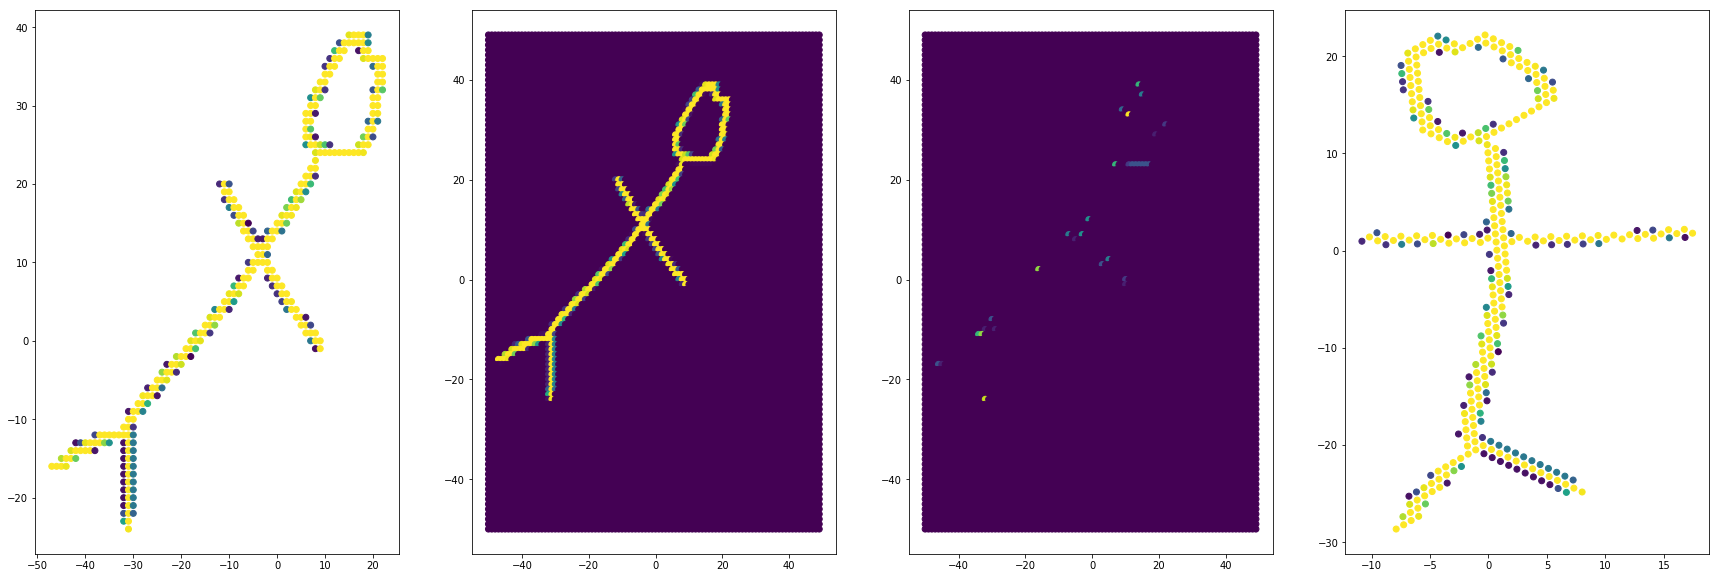

In [471]:
def object_extraction(coord_mat, min_val=0.2):
    min_pixel_val = np.repeat([[min_val]], coord_mat.shape[1], axis=1) 
    extracted_object_coords = np.greater(coord_mat, min_pixel_val)
    new_object = coord_mat.copy()[:,extracted_object_coords[2,:]]
    coord_mat[2,extracted_object_coords[2,:]] = 0
    return new_object

def orientation_normalization(coord_mat):
        weights = coord_mat[2, :]
        primary_vector, seconday_vector, mean_vector = weighted_pca_regression(coord_mat[0,:], coord_mat[1,:], coord_mat[2,:])
        angle = np.arctan2(primary_vector[1], primary_vector[0]) * 180 / np.pi
        R = rotation_matrix(90-angle)
        mean_mat = np.array([mean_vector[0], mean_vector[1], 0])
        mean_mat = np.diag(mean_mat)
        mean_mat = np.matmul(mean_mat, np.ones(coord_mat.shape))
        eig_1 = np.linalg.norm(primary_vector)
        eig_2 = np.linalg.norm(seconday_vector)
        norm_scale_mat = np.zeros([3,3])
        norm_scale_mat[0,0] = 5/eig_2
        norm_scale_mat[1,1] = 15/eig_1
        norm_scale_mat[2,2] = 1
        transformed_mat = np.matmul(norm_scale_mat, np.matmul(R, coord_mat - mean_mat))
        return transformed_mat
    
fig, ax = plt.subplots(1,4, figsize=(30,10))
copy_tensor = img_tensor.copy()
img_tensor2 = img_tensor.copy()
# np.round_(img_tensor2[img_tensor2[1:] > 25])
plot_coord_mat(copy_tensor, ax[1])

 

# bigger = np.logical_and(bigger[0,:],bigger[1,:])

# less = np.less(img_tensor2, max_box)
# # less = np.logical_and(less[0,:],less[1,:])
# img_tensor2 = img_tensor2[:,less[2,:]]
new_object = object_extraction(img_tensor2, min_val=0.05)
plot_coord_mat(new_object, ax[0])
plot_coord_mat(img_tensor2, ax[2])
plot_coord_mat(orientation_normalization(new_object.copy()), ax[3])
# ax[2].imshow(coord_mat_to_img(img_tensor2, 64, 62))

    
    
    

In [386]:
data = np.array([[4,2,1],[3,5,2],[7,1,8]])
x_min = np.repeat([[0],[1],[2]], data.shape[0], axis=1)
print(x_min)
print(data)
print(np.greater(data,x_min))
bigger = np.greater(data,x_min)
bigger = np.logical_and(bigger[0,:],bigger[1,:])
print(bigger)
data[:,bigger]


[[0 0 0]
 [1 1 1]
 [2 2 2]]
[[4 2 1]
 [3 5 2]
 [7 1 8]]
[[ True  True  True]
 [ True  True  True]
 [ True False  True]]
[ True  True  True]


array([[4, 2, 1],
       [3, 5, 2],
       [7, 1, 8]])